In [1]:
# Analysis of query parallelism
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%matplotlib inline

In [2]:
# Load server count and I/O stats
df = pd.read_parquet('~/snowflake-analysis/snowset-main.parquet', columns = ['serverCount',
                                                                'intDataNetSentBytes', 
                                                                'persistentReadBytesCache', 
                                                                'persistentReadBytesS3', 
                                                                'persistentWriteBytesS3'],
                    engine='fastparquet')

In [4]:
# Calculate total amount of persistent data bytes read and written
df['persistentReadBytes'] = df['persistentReadBytesCache'] + df['persistentReadBytesS3']
# Cache is write-through
df['persistentWriteBytes'] = df['persistentWriteBytesS3'] 

# Assign query classes
df['ronly'] = (df['persistentWriteBytes'] == 0)
df['wonly'] = (df['persistentReadBytes'] == 0)
df['rw'] = ((df['persistentReadBytes'] > 0) & (df['persistentWriteBytes'] > 0))


In [6]:
df.sort_values(by='serverCount', ascending=False, inplace=True)


In [8]:
df.reset_index(drop=True, inplace=True)

Text(0.5, 0.98, 'R-only queries')

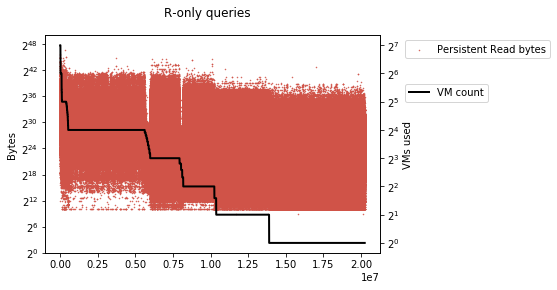

In [32]:
# Plot
qs = df[df['ronly']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['persistentReadBytes'], marker='.', c='#d05348', s=1, label='Persistent Read bytes')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('R-only queries')

Text(0.5, 0.98, 'R-only queries')

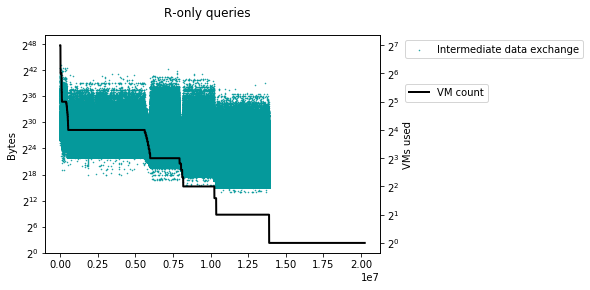

In [33]:
qs = df[df['ronly']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['intDataNetSentBytes'], marker='.', c='#05999b', s=1, label='Intermediate data exchange')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('R-only queries')

Text(0.5, 0.98, 'W-only queries')

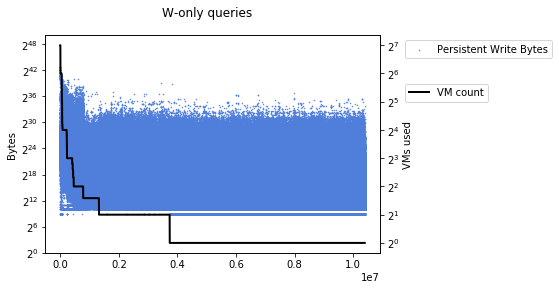

In [34]:
qs = df[df['wonly']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['persistentWriteBytes'], marker='.', c='#4f7edb', s=1, label='Persistent Write Bytes')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('W-only queries')

Text(0.5, 0.98, 'W-only queries')

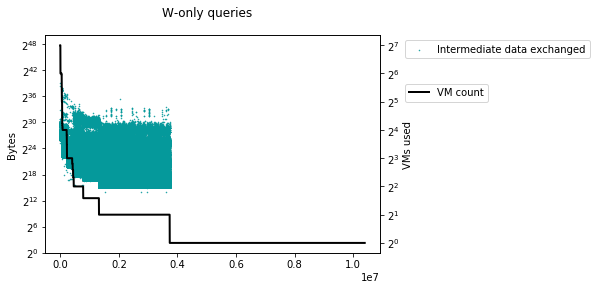

In [35]:
qs = df[df['wonly']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['intDataNetSentBytes'], marker='.', c='#05999b', s=1, label='Intermediate data exchanged')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('W-only queries')

Text(0.5, 0.98, 'RW queries')

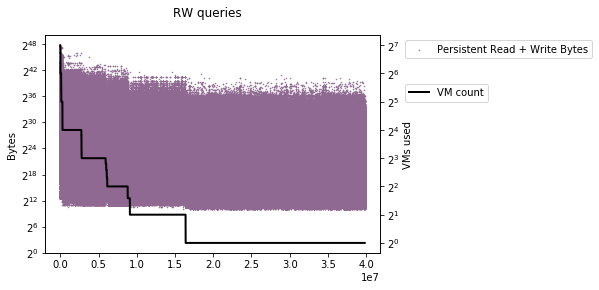

In [36]:
qs = df[df['rw']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['persistentWriteBytes'] + qs['persistentReadBytes'], marker='.', c='#906992', s=1, label='Persistent Read + Write Bytes')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('RW queries')

Text(0.5, 0.98, 'RW queries')

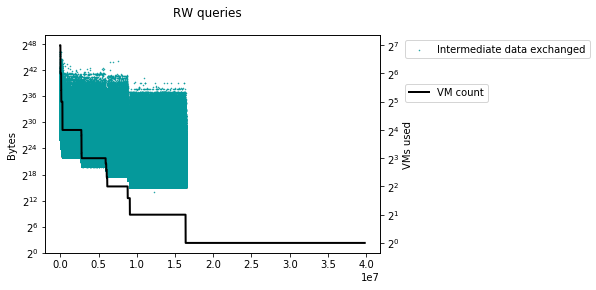

In [37]:
qs = df[df['rw']].reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(qs.index, qs['intDataNetSentBytes'], marker='.', c='#05999b', s=1, label='Intermediate data exchanged')
ax.set_yscale('log', basey=2)
ax.set_ylabel('Bytes')
ax.set_ylim((1,2**50))
ax.legend(bbox_to_anchor=(1.06,1), loc="upper left")

ax2 = ax.twinx()
ax2.plot(qs.index, qs['serverCount'], c='#000000', linewidth=2, label='VM count')
ax2.set_yscale('log', basey=2)
ax2.set_ylabel('VMs used')
ax2.legend(bbox_to_anchor=(1.06,0.8), loc="upper left")

fig.suptitle('RW queries')